# **Modelling**

### Entrenamiento de modelos de Machine Learning

### **Selección de los Modelos**

1. Decision Tree.
   
2. Random Forest.
   
3. Gradient Boost.
   
4. Logistic Regression.
   
5. Ensemble.

6. SVM.

## **Logistic Regression**

La Regresión Logística es uno de los algoritmos de Machine Learning más simples y más utilizados para la clasificación de dos clases. Es fácil de implementar y se puede usar como línea de base para cualquier problema de clasificación binaria. Describe y estima la relación entre una variable binaria dependiente y las variables independientes.

Este modelo logístico binario se utiliza para estimar la probabilidad de una respuesta binaria basada en una o más variables predictoras o independientes.

#### LIBRERÍAS NECESARIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, plot_confusion_matrix, confusion_matrix

#### EXTRACCIÓN & CARGA DE DATOS

In [3]:
data_train = pd.read_csv('../data/PROCESADO/data_train.csv', sep=',')

In [4]:
data_train

,PassengerId,CryoSleep,Age,VIP,Transported,Add_Services,No_Services,Cabin_Side,Earth,Europa,Mars,55 Cancri e,PSO J318.5-22,TRAPPIST-1e
0,0001_01,0,39.0,0,False,0.0,1,0,0,1,0,0,0,1
1,0002_01,0,24.0,0,True,736.0,0,1,1,0,0,0,0,1
2,0003_01,0,58.0,1,False,10383.0,0,1,0,1,0,0,0,1
3,0003_02,0,33.0,0,False,5176.0,0,1,0,1,0,0,0,1
4,0004_01,0,16.0,0,True,1091.0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0,41.0,1,False,8536.0,0,0,0,1,0,1,0,0
8689,9278_01,1,18.0,0,False,0.0,1,1,1,0,0,0,1,0
8690,9279_01,0,26.0,0,True,1873.0,0,1,1,0,0,0,0,1
8691,9280_01,0,32.0,0,False,4637.0,0,1,0,1,0,1,0,0


### **Preparación del Entrenamiento**

In [5]:
X = data_train.drop("Transported", axis=1)
y = data_train["Transported"]

#### Separamos los datos en dos conjuntos, uno para el entrenamiento (train), y otro para la validación (test). 70% para el entrenamiento(train), y el 30% de los datos para la validación(test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

print(f'TRAIN = X_train:{X_train.shape}, y_train:{y_train.shape}')
print(f'TEST = X_test:{X_test.shape}, y_test:{y_test.shape}')

TRAIN = X_train:(6085, 13), y_train:(6085,)
TEST = X_test:(2608, 13), y_test:(2608,)


In [7]:
lg = LogisticRegression(max_iter = 81, solver = 'newton-cg', random_state = 45,  multi_class = 'auto', C = 2.)

lg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Framewo

LogisticRegression(C=2.0, max_iter=81, random_state=45, solver='newton-cg')

In [8]:
y_hat = lg.predict(X_train)

y_hat1 = lg.predict(X_test)

In [17]:
print("LOGISTIC REGRESSION:")

print('Precisión del Entrenamiento: {0}%'.format(np.round(accuracy_score(y_train, y_hat) * 100, 2)))

print('Precisión del Test: {0}%'.format(np.round(accuracy_score(y_test, y_hat1) * 100, 2)))

LOGISTIC REGRESSION:
Precisión del Entrenamiento: 72.01%
Precisión del Test: 74.04%


### Matriz de Confusión 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


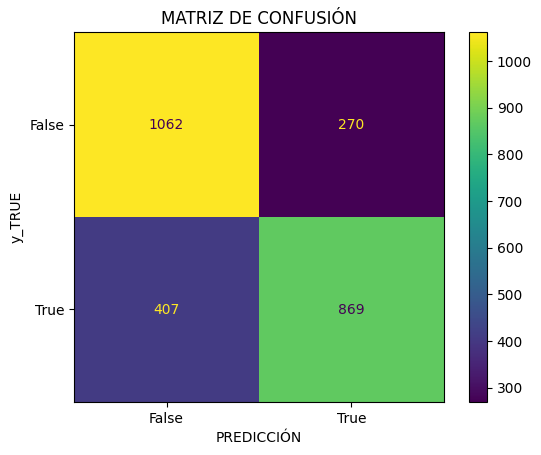

In [10]:
plot_confusion_matrix(lg, X_test, y_test)
plt.xlabel("PREDICCIÓN")
plt.ylabel("y_TRUE")
plt.title("MATRIZ DE CONFUSIÓN")
plt.show();

### **VALIDACIÓN/TEST**

#### CARGA DE DATOS

In [11]:
data_test = pd.read_csv('../data/PROCESADO/data_test.csv', sep=',')

### **PREDICCIÓN**

In [12]:
predic = pd.DataFrame(lg.predict(data_test))

predic['PassengerId'] = data_test['PassengerId']

predic = predic.rename(columns = {0:'Transported'})

predic = predic[['PassengerId','Transported']]

In [13]:
predic

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [14]:
predic.isnull().sum()

PassengerId    0
Transported    0
dtype: int64

### GUARDAMOS EN UN CSV LA PREDICCIÓN(Submission)

In [15]:
predic.to_csv('../data/SUBMISSIONS/Sub_LG.csv', index=False)